# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
* The smartcab does not move during the simulation. It is just at the intersection.
* A positive reward (approx +2.8) is awarded to the smartcab when it is idling with red signal at the intersection. A big negative reward (approx -5) is awarded to the smart cab when it is not moving during a green light with no oncoming traffic. 
* Having a red light at the intersection should prompt the smartcab to stop which gives a positive reward. If a green light with no oncoming traffic is observed then the smartcab should take an action by moving in a particular direction, not performing this action results in a negative reward as the smartcab in reality will be causing a traffic jam at the intersection which is potentially a dangerous scenario.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1) In the *agent.py* file i choose the following three flags:

i) **Learning:** This flag can be used to make the agent to learn using Q-learning. Currently the agent has this flag set to False, therefore the smartcab is not expected to change its default behavior during the simulation. This flag also has sub flags epsilon (exploration factor) and alpha (learning rate) which influence the main learning flag.

ii) **enforce_deadling:** This flag can be set to impose deadline conditions for the trips. Currently this is set to flase implying there is no timing restriction.

iii) **num_dummies:** This flag corrseponds to number of dummy agents i.e "traffic". Currently a default value of 100 is being used. if this number is increased then we can say there is more traffic, if it is lesser then there is less traffic.

2) In the *environment.py* file the 'act()' function is called when an agent performs an action

3) In the *simulator.py* file the 'render_text()' function echoes the Simulated trail related data in the command prompt. The 'render()' function displays the simulated trail data on a GUI. So basically perform same functionality.

4) In the *planner.py* file the 'next_waypoint()' considers the *East-West* direction first and then *North-South* direction

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


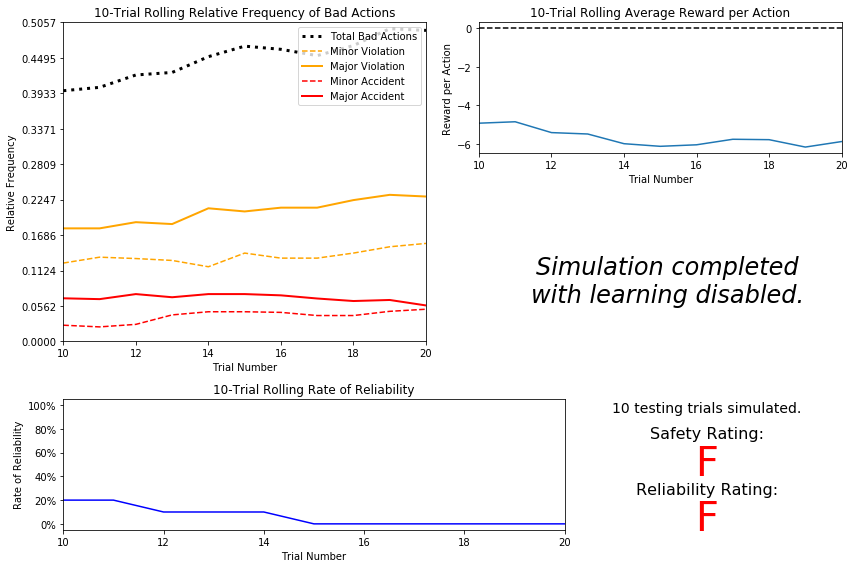

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
*  Initially the driving agent is making 39.33% bad decisions which is leading to possibility of approx 6% for having a major accident. At the end of the trail the driving agent is making 50.57% bad decisions which is having 5.6% for having a major accident

* Yes, the low reliability rate does make sense because the driving agent is not learning and moving randombly which says that it takes a very long time to complete the trip

* The average rewards per action wrt each trail is negative which suggests that the agent is being penalized. But the trend suggests that it got penalized initially and then got a bit better at the end. This can be because of the inrease in violations and small decrement in accidents at the end. So this suggests that driving agent is not penalized heavily because it does recieve some good rewards.

* As trail increases the reliability decreases because of increse in violations and the amount of bad decisions the agent is making, It has started at 20% at the start and is 0% reliable at the end. Due to violaitions the safety conditions are also very bad which is categorized as 'F' grade.

* This Smartcab would not be considered safe nor reliable for its passengers. It is driving randomly all the time and making bad decisions which increases the violations and minor accidents. This could be very harmful for the passengers. It is also late almost for all the trails conducted.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** 

For learning **safety** i would consider the following features:

* **inputs - 'light'** := I think the color of the light is important because the agent has to verify the traffic rules. In particular, the smartcab should stop at a red light. 
* **inputs - 'left'** := This parameter indicates the smartcab if there is a vehicle present on the left and its inteded action to follow left or to wait till the traffic is cleared.
* **inputs - 'oncoming'** := the smartcab must know if there is a vehicle coming in the opposite direction when it is trying to make a left turn, so as to not go into a road with oncoming traffic when deciding to turn left. If the agent decides to drive into oncoming traffic, then it will cause either a minor traffic violation or, if there is a vehicle present, a major accident

For learning **efficiency** i would consider the following features:
* **waypoint** :=  The waypoint will be appropriate for achieving efficiency. Using this the smartcab will learn how to reach the destination effectively.

The following features are not very important:

* **inputs - 'right'** := this parameter indicates the smartcab if there is a vehicle present on the right and its intended action to follow right or wait till the traffic is cleared. Most of the times in US making right turn is almost all the times allowed as the lane for the right turn is always a separate. Only in some special cases where there is a red right arrow the car has to stop. It means that when there is no vehicle on the right and no red arrow you are free to go always. So it is not necessary to have this feature for learning.

* **deadline** := is important for the smartcab to get to the destination with least amount of time reliably. But it is not as relevent as others because the Smartcab agent needs to know the deadline, but it should be able to learn it from the reward it receives as it builds its Q table. If we add this feature as well, then the statespace size increases and it takes a lot of time to converge. So it would be better to leave this feature because the agent should try to understand from its recieving rewards

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** from my selection of features above there would be 4 features and an action to learn.
* 1) **inputs - 'light'** := can be red or green -- 2 states possible
* 2) **inputs - 'left'** := can be None, forward, left, right -- 4 states possible
* 3) **inputs - 'oncoming'** := can be None, forward, left, right -- 4 states possible
* 4) **waypoint** := can be forward, left, right -- 3 possible states
* **Action to perform** := can be None, forward, left, right -- 4 states possible (should not include)

** Total states would be : 2 x 3 x 4 x 4 = 96 states. This is not a very huge number i think the smartcab agent can learn these states in finite number of trails **

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

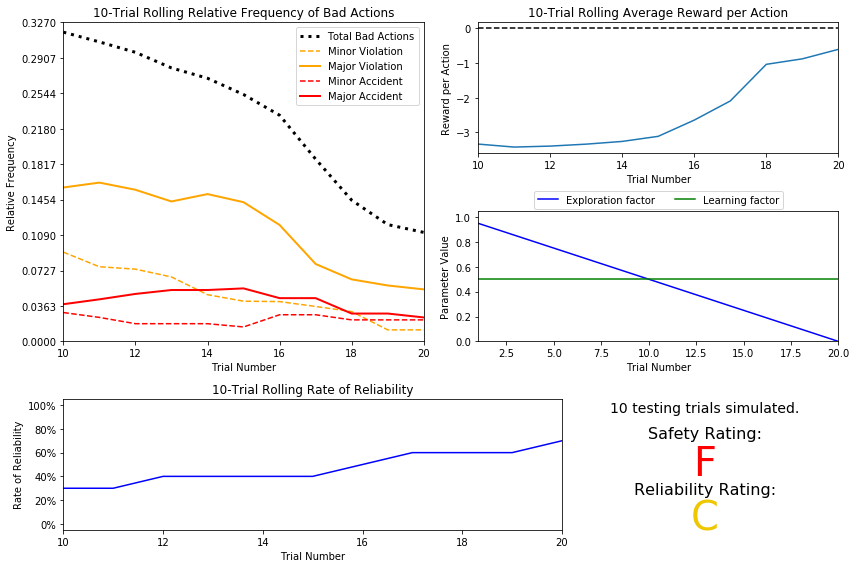

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
* Fraction of total bad actions, violations, accidents, rate of reliability are all different in Q-learning agent when compared to the basic driving agent. Fraction of bad actions, violations and accidents decreased gradually over the trails for the Q-learning agent. The reliability of the Q-learning agent improved from 30% to 70% which is a very good improvement.
* 20 training trails were performed before the Q-learning agent perfomed testing. This makes sense given a constant decay of 0.05 for epsilon. As the initial value of epsilon is 1 and a decay of 0.05 would make it zero in 20 steps (1.0 - (20 x 0.05) = 0.0 < 0.05).
* Yes, the constant decaying function for Ïµ (the exploration factor) does accurately represent the parameters panel.
* The reliability rating has improved a bit but the safety rating has not been improved even though the fraction of bad accidents, bad actions tend to decrease when compared to the basic driving agent

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

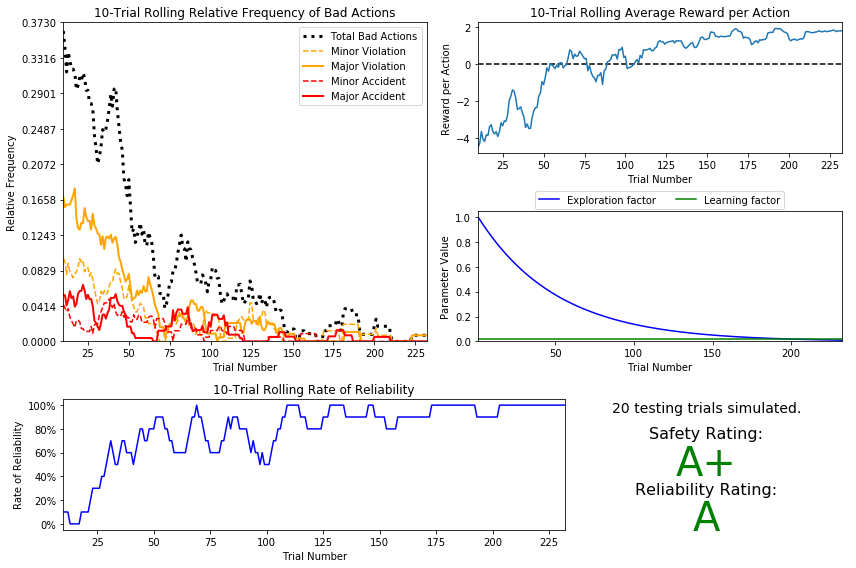

In [31]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** 
* 1) An exponential decaying function of the for exp(-alpha x t) was used with epsilon starting at 1 and alpha value being 0.02.
* 2) Approximately 230 trails were needed before the agent started to do the testing
* 3) An epsilon tolerance of 0.01 and alpha of 0.02 is used for the training. Small value of alpha is used inorder to increase the number of trails so that the agent could learn the states efficiently inorder to increase the safety rating when compared to the un-optimized Q learning agent. As a result of the small vaue of alpha being used, a smaller tolerance is necessary to ensure all the trails are being observed
* 4) The optimized Q-learnen is definitely better than the previous Q-learner because:

    * The Safety Rating has increased from an F to an A+
    
    * The Reliability Rating has increased from an C to an A 

  These improvements are very promising to make the deployment of the smartcab
  
* 5) Yes i would say the driving agent has learned a policy appropriately because from the fraction of bad actions, accidents and violations all have reduced and converged below 0.5% and the average rewards per trail also increased to a positive values over the training which suggests that the smartcab agent is making good decisions. The testing trails also give good ratings.
* 6) Yes i am satisfied with the reliability ratings of the smartcab. But in reality there are number of more factors which have to be considered inorder to do Q-learning for the smartcab, those can traffic congestion informations, traffic movement rate etc.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** **updated** 

1) The state space for my agent is : (waypoint,light,left,oncoming) ==> action to be performed. So the best set of instructions could be:
**Example: **
* **Set-1:** Basic rule for red light
    * (forward,red,None,None) ==> Action: Stationary --> optimal policy
    * (forward,red,None,None) ==> Action: left/forward --> not optimal
    * (forward,red,None,None) ==> Action: right --> sub optimal
    * (forward,red right arrow,right,right) ==> Action: None --> Optimal 
* **Set-2:** Basic rule for the green light
    * (forward,green,None,None) ==> Action: forward --> optimal policy
    * (left/right,green/right_green_arrow,None,None ) ==> Action: left/right --> optimal policy
    * if the oncoming traffic is in a direction which will cause a collision, the action in direction of traffic should be avoided --> optimal policy
    * The agent should also learn to turn left by waiting first when there is oncoming traffic travelling from left to right :=
    (Left,green,None,right) ==> Action: Stationary --> optimal policy

2) Yes there are very few cases where the agent did not take the optimal expected policy. But smartcab ratings for safety: A+ and reliability is A+ have improved from previous submission

3) Considering a case from **Set-1** and looking in "sim-improved-learning.txt": 

There was this case **('forward', 'red', None, None)** where the behavior matched the description above

Result Values: 
* forward : -3.32 --> Not Optimal
* right : 0.26 --> Next Highest Value --> Sub optimal policy
* None : 1.88 --> Highest Value --> Optimal policy as expected from above
* left : -2.27 --> Not optimal
* Conclusion: I think this case demonstrates the main important red-signal rule which is the very basic rule in driving that the agent should not do anything when the signal is red => This minimizes violations and accidents, which coincides with our performance that our agent is A+ in safety and also it is reliable as it is moving in the waypoint direction

Considering a case from **Set-2** and looking in "sim-improved-learning.txt":
There was this case **('forward', 'green', None, None)** where the behavior matched the description above

Result Values: 
* forward : 1.87 --> Highest Value --> Optimal Policy as expected from above
* right : 0.21
* None : -0.91
* left : 0.15
* Conclusion: I think this case is a basic green light forward moving case when there is no oncoming traffic. The Q-learning agent was able to perform using the optimal policy here => This should be expected because of the performance of our smartcab

Considering a case from **Set-2** and looking in "sim-improved-learning.txt":
There was this case **('left', 'green', None, None)** where the behavior matched the description above

Result Values:
* forward : 0.20
* right : 0.14
* None : -1.21
* left : 1.70 --> Highest Value--> Opimal policy as expected from above
* Conclusion: This case also has same explanations as above

4) Few cases where i think the agent has not learned the optimal policies. i)Considering a case from **Set-2** and looking in "sim-improved-learning.txt":

### case-i observed before tie-breaking correction
There was this case **('forward', 'red', 'right', 'right')** where the behavior did not match the description above

Result Values:
* forward : -0.19
* right : 0.09 --> Observed Optimal Value
* None : 0.00 --> Expected optimal Value := Because in Gemrany red light indicates, red even in right directed turn. A bit ambigous for me. In US setting i think this result is correct
* left : -0.78
* Conclusion:  Not very clear for me because i think based on the conditions in germany, which are different from US

### case-i observed after tie-breaking correction
There was this case **('forward', 'red', 'right', 'right')** where the behavior did not match the description above

Result Values:
* forward : -0.79
* right : 0.00 
* None : 0.11 --> Expected and observed optimal Value matched := Because in Gemrany red light indicates, red even in right directed turn.
* left : 0.00
* Conclusion:  This result matched my expectation and also it does comply with the basic rules listed above

### case-ii observed before tie-breaking correction
ii) Considering a new case not from above: 

New Case - **('left', 'green', 'forward', 'forward')**
* forward : 0.20 --> Observed Optimal Policy
* right : 0.02
* None : -0.08 --> I expected this
* left : -0.41 --> Not optimal because there is a car to the left which is moving forward
* Conclusion: In this case the smartcab was successful in knowing that turning left will cause collision but it did not wait until the traffic on the left side got cleared. Instead it moved forward deviating from the waypoint which suggest the Q-learner prefers safety over reliability which coincides with the overall performance of A for reliability and A+ for safety.

### case-ii observed  after tie-breaking correction
ii) Considering a new case not from above: 

New Case - **('left', 'green', 'forward', 'forward')**
* forward : 0.00 
* right : 0.11 --> Observed
* None : -0.09 --> I expected this
* left : 0.00 --> Not optimal because there is a car to the left which is moving forward
* Conclusion: In this case the smartcab was successful in knowing that turning left will cause collision but it did not wait until the traffic on the left side got cleared. This case is still not learned according to my intution because the car is moving right instead of being stationary




-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.